# **ΑΣΚΗΣΗ 1**

Η συνάρτηση εξόδου του νευρωνικού είναι η σιγμοειδής, η οποία είναι δημοφιλής επιλογή για προβλήματα λογιστικής παλινδρόμησης (logistic regression). Ο κύριος λόγος χρήσης τους είναι ότι φράσσουν την έξοδο από [0,1] οπότε σε τέτοιας φύσεως προβλήματα δίνονται άμεσα οι πιθανότητες ένα δείγμα να ανήκει σε κάθε κλάση ξεχωριστά.


Τα δεδομένα είναι απαραίτητο να κανονικοποιηθούν. Αν δεν γίνει αυτή η προεπεξεργασία αρχικά, τα χαρακτηριστικά που παρουσιάζουν πολύ μεγαλύτερη ή πολύ μικρότερη τάξη μεγέθους συγκριτικά με τα υπόλοιπα, θα οδηγούν την έξοδο σε κορεσμό, δηλαδή σε σημεία της συνάρτησης πολυ βαθιά στις ασύμπτωτες. Αυτό έχει ως συνέπεια την ραγδαία σμίκρυνση των παραγώγων, και στο εξής το μοντέλο να οδηγείται σε πρόωρο τερματισμό εκπαίδευσης θεωρώντας πως έχει βρεθεί μια από τις βέλτιστες λύσεις.

Επίσης για κριτήριο - συνάρτηση απώλειας χρησιμοποιείται η Binary Cross Entropy - BCE. Η BCE είναι η καλύτερη συνάρτηση απώλειας για προβλήματα λογιστικής παλινδρόμησης με δύο κλάσεις. Απλά μετρά τη διαφορά μεταξύ των προβλεπόμενων πιθανοτήτων (από το μοντέλο λογιστικής παλινδρόμησης) και των πραγματικών ετικετών (0 ή 1) και ο μαθηματικός φορμαλισμός της επιβραβεύει η τιμωρεί σε κατάλληλο βαθμό ανάλογα με τη σωστή η λάθος ταξινόμηση.0


Training with Sigmoid activation:
Epoch 1/100, Train Loss: 0.6904, Validation Accuracy: 0.5556
Epoch 2/100, Train Loss: 0.6818, Validation Accuracy: 0.6000
Epoch 3/100, Train Loss: 0.6763, Validation Accuracy: 0.6963
Epoch 4/100, Train Loss: 0.6721, Validation Accuracy: 0.6519
Epoch 5/100, Train Loss: 0.6684, Validation Accuracy: 0.6444
Epoch 6/100, Train Loss: 0.6649, Validation Accuracy: 0.6222
Epoch 7/100, Train Loss: 0.6616, Validation Accuracy: 0.6074
Epoch 8/100, Train Loss: 0.6585, Validation Accuracy: 0.6296
Epoch 9/100, Train Loss: 0.6557, Validation Accuracy: 0.6370
Epoch 10/100, Train Loss: 0.6519, Validation Accuracy: 0.6593
Epoch 11/100, Train Loss: 0.6490, Validation Accuracy: 0.6667
Epoch 12/100, Train Loss: 0.6454, Validation Accuracy: 0.6741
Epoch 13/100, Train Loss: 0.6425, Validation Accuracy: 0.6889
Epoch 14/100, Train Loss: 0.6391, Validation Accuracy: 0.6815
Epoch 15/100, Train Loss: 0.6362, Validation Accuracy: 0.6963
Epoch 16/100, Train Loss: 0.6338, Validation 

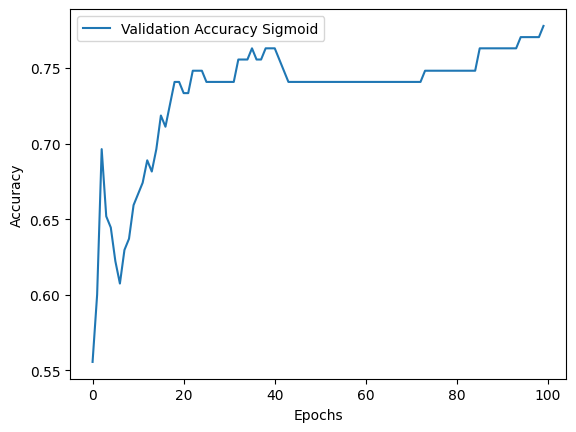

Accuracy on test set was 77.94117647058823%


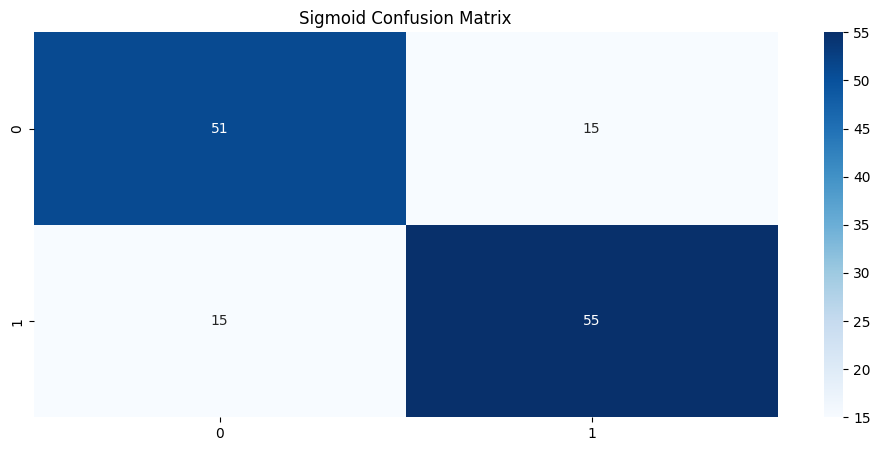

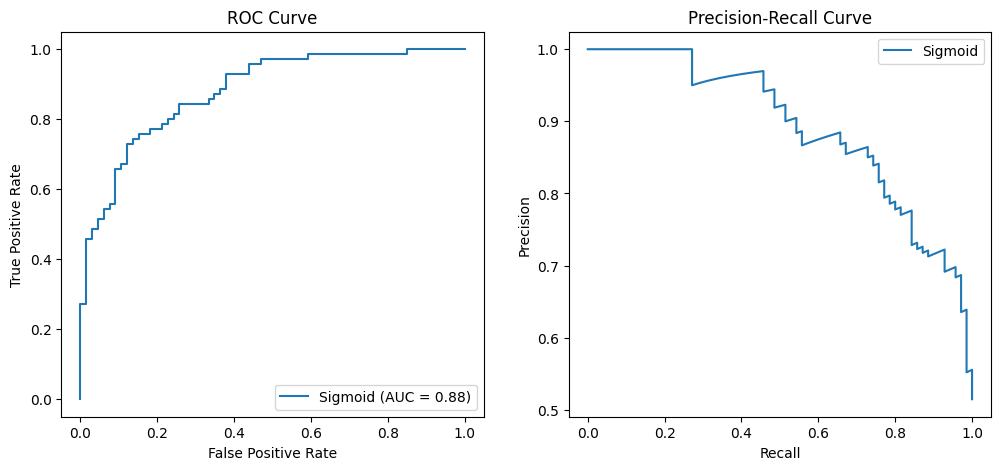


Training with ReLU activation:
Epoch 1/100, Train Loss: 0.6781, Validation Accuracy: 0.5852
Epoch 2/100, Train Loss: 0.6605, Validation Accuracy: 0.6667
Epoch 3/100, Train Loss: 0.6439, Validation Accuracy: 0.6593
Epoch 4/100, Train Loss: 0.6304, Validation Accuracy: 0.6593
Epoch 5/100, Train Loss: 0.6177, Validation Accuracy: 0.6667
Epoch 6/100, Train Loss: 0.6056, Validation Accuracy: 0.6741
Epoch 7/100, Train Loss: 0.5950, Validation Accuracy: 0.6815
Epoch 8/100, Train Loss: 0.5845, Validation Accuracy: 0.6815
Epoch 9/100, Train Loss: 0.5745, Validation Accuracy: 0.6889
Epoch 10/100, Train Loss: 0.5663, Validation Accuracy: 0.6963
Epoch 11/100, Train Loss: 0.5569, Validation Accuracy: 0.6963
Epoch 12/100, Train Loss: 0.5476, Validation Accuracy: 0.7037
Epoch 13/100, Train Loss: 0.5398, Validation Accuracy: 0.7037
Epoch 14/100, Train Loss: 0.5331, Validation Accuracy: 0.7037
Epoch 15/100, Train Loss: 0.5252, Validation Accuracy: 0.7037
Epoch 16/100, Train Loss: 0.5178, Validation Ac

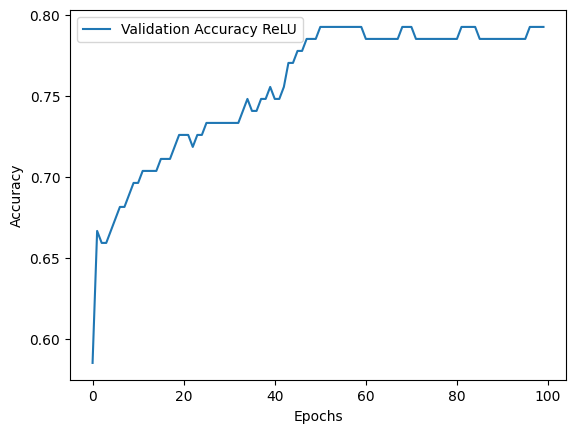

Accuracy on test set was 83.08823529411765%


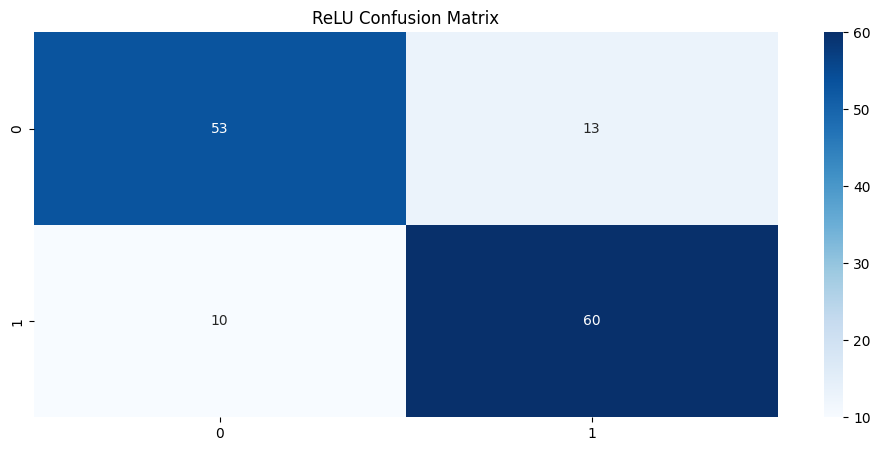

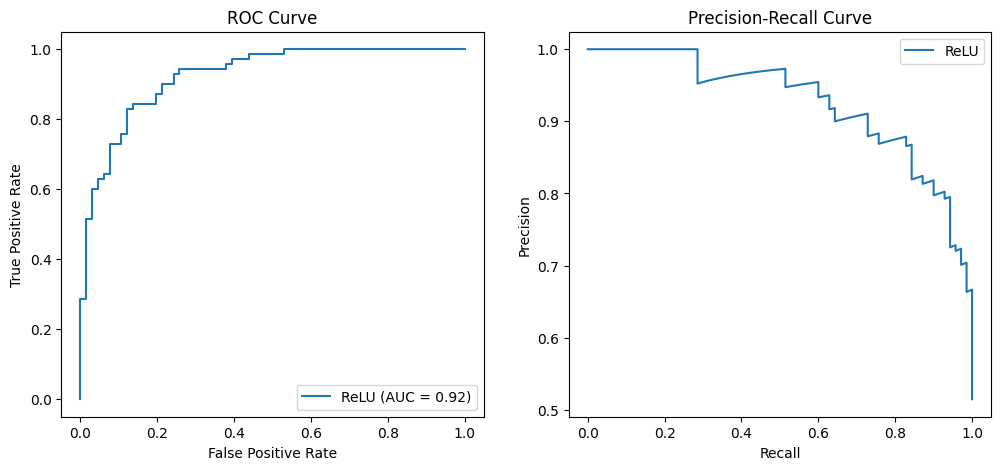

In [24]:
import numpy as np
import random
import pandas as pd
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

i = 25
#for i in range(10):
# Set seed for reproducibility
seed = i
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

# Load data
data = pd.read_csv('Data_bank_additional_balanced.csv')
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to PyTorch tensors for nn data compatibility
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1)
#print(y_tensor)

# Split dataset (70% training, 15% validation, 15% test)
dataset = TensorDataset(X_tensor, Y_tensor) # Bundle X and Y
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_set, val_set, test_set = random_split(dataset, [train_size, val_size, test_size])
#print(train_set)
train_loader = DataLoader(train_set, batch_size=32, shuffle=True, worker_init_fn=np.random.seed(seed))
val_loader = DataLoader(val_set, batch_size=32, shuffle=True, worker_init_fn=np.random.seed(seed))
test_loader = DataLoader(test_set, batch_size=32, shuffle=True, worker_init_fn=np.random.seed(seed))

# Define the neural network model
class NeuralNet(nn.Module):
    def __init__(self, activation_function):
        super(NeuralNet, self).__init__() # Call parent constructor for proper parameter initialisation
        self.model = nn.Sequential(
          nn.Linear(X.shape[1], 32),
          activation_function,
          nn.Linear(32, 1),
          nn.Sigmoid()
        )

    def forward(self, x):
        x = self.model(x)
        return x

# Training function
def train_model(model, optimizer, criterion, train_loader, val_loader, epochs):
    train_loss_history = []
    val_accuracy_history = []
    best_val_accuracy = 0
    # For 100 epochs
    for epoch in range(epochs):
        model.train() # Switch to training mode
        train_loss = 0
        for X_batch, Y_batch in train_loader:
            optimizer.zero_grad() # To prevent gradient contamination
            predictions = model(X_batch) # Feed data and get predictions ε[0,1]
            loss = criterion(predictions, Y_batch) # MSE, BCE, CSE etc to assess error
            loss.backward() # Update weights based on gradients
            optimizer.step() # Update model parameters
            train_loss += loss.item() # Calculate running loss for this batch

        train_loss /= len(train_loader) # Mean loss in i-th epoch
        train_loss_history.append(train_loss)

        # Validation accuracy each epoch
        model.eval() # Switch to evaluation mode - disable dropout for consistent results / enable batchNorm for running statistics
        correct = 0
        total = 0
        with torch.no_grad(): # Won't use backwards method so disable it to save memory
            for X_batch, Y_batch in val_loader:
                predictions = model(X_batch)
                predicted_labels = (predictions >= 0.5).int() # Bool array (turned into int for comparison) to indicate which of the elements are >=0.5
                correct += (predicted_labels == Y_batch).sum().item()
                total += Y_batch.size(0)

        val_accuracy = correct / total
        val_accuracy_history.append(val_accuracy)

        # Save the model with the best validation accuracy
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            # best_model_weights = model.state_dict()  # Save the model's weights at the best epoch - not necessarily a good metric

        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    print(f"Best validation accuracy achieved was: {best_val_accuracy:.4f}")

    return train_loss_history, val_accuracy_history

def test_model(model, test_loader):
  model_sigmoid.eval()
  y_true = []
  y_pred = []
  with torch.no_grad():
    for X_batch, Y_batch in test_loader:
        predictions = model(X_batch)
        y_true.extend(Y_batch.numpy())
        y_pred.extend(predictions.numpy())

  return y_pred, y_true

def model_metrics(history, model_name, all_labels):
  # Plot validation accuracy
  plt.plot(history[1], label=f"Validation Accuracy {model_name}")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  # Compute confusion matrix
  thresh_predictions = (np.array(all_labels[0]) >= 0.5).astype(int)
  conf_matrix = confusion_matrix(all_labels[1], thresh_predictions)

  # Test accuracy
  correct_predictions = 0
  for true, predicted in zip(thresh_predictions, all_labels[1]):
    if true == predicted:
        correct_predictions += 1

  test_accuracy = correct_predictions / len(all_labels[0]) * 100
  print(f"Accuracy on test set was {test_accuracy}%")

  plt.figure(figsize=(12, 5))
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
  plt.title(f"{model_name} Confusion Matrix")

  # Precision-Recall and ROC curves
  fpr, tpr, _ = roc_curve(all_labels[1], all_labels[0])
  roc_auc = auc(fpr, tpr)

  precision, recall, _ = precision_recall_curve(all_labels[1], all_labels[0])

  plt.figure(figsize=(12, 5))

  # ROC Curve
  plt.subplot(1, 2, 1)
  plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend()

  # Precision-Recall Curve
  plt.subplot(1, 2, 2)
  plt.plot(recall, precision, label=model_name)
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.legend()

  plt.show()


# Initialize and train the model (Sigmoid activation)
model_sigmoid = NeuralNet(nn.Sigmoid())
criterion = nn.BCELoss()
optimizer = optim.SGD(model_sigmoid.parameters(), lr=0.01)

print("Training with Sigmoid activation:")
history_sigmoid = train_model(model_sigmoid, optimizer, criterion, train_loader, val_loader, epochs=100)

# Evaluate on test set
y_sigmoid = test_model(model_sigmoid, test_loader)

# Print metrics for model with Sigmoid activation
model_metrics(history_sigmoid, "Sigmoid", y_sigmoid)

# Repeat for ReLU activation
model_relu = NeuralNet(nn.ReLU())
optimizer = optim.SGD(model_relu.parameters(), lr=0.01)

print("\nTraining with ReLU activation:")
history_relu = train_model(model_relu, optimizer, criterion, train_loader, val_loader, epochs=100)

y_relu = test_model(model_relu, test_loader)

model_metrics(history_relu, "ReLU", y_relu)



***ΕΡΩΤΗΜΑ Γ***

Κατά την ανάπτυξη των μοντέλων χρησιμοποιήθηκε σταθερή ψευδοτυχαία διαδικασία, αμιγώς για τον λόγο ότι είναι επιθυμητή η επαναληψιμότητα για τη διασφάλιση ορθής λειτουργίας των μοντέλων, καθόσον χτίζονται και γίνονται δοκιμές ως προς τη δομή τους και όχι τόσο στην απόδοση.

Για αυτό το ερώτημα ωστόσο δοκιμάστηκαν 10 διαφορετικά seeds για τις διάφορες τυχαιοποιημένες εργασίες, όπως είναι η ομαδοποίηση δεδομένων (batches). Σε όλες τις δοκιμές η συνάρτηση ενεργοποίησης ReLU στο κρυφό επίπεδο φάνηκε να κάνει το σύστημα πιο ακριβές ως προς τις προβλέψεις του συνολικά.

Ένας από τους λόγους που συμβαίνει αυτό είναι ότι η ύπαρξή της στο κρυφό επίπεδο επιτρέπει την γραμμική αύξηση από τις εισόδους χωρίς να ψαλιδίζει τις τιμές από τους νευρώνες του επιπέδου. Επίσης είναι υπολογιστικά γρηγορότερη και απλότερη στην υλοποίηση (όπως και η παράγωγός της) πράγμα που είναι σημαντικό σε ένα μικρό δίκτυο που έχει περιορισμένο αριθμό εποχών εκπαίδευσης και σύνολο δεδομένων, γιατί παρουσιάζει ταχύτερη σύγκλιση.

Training with Sigmoid activation:
Epoch 1/50, Train Loss: 0.6947, Validation Accuracy: 0.5185
Epoch 2/50, Train Loss: 0.6636, Validation Accuracy: 0.6889
Epoch 3/50, Train Loss: 0.5933, Validation Accuracy: 0.7037
Epoch 4/50, Train Loss: 0.5270, Validation Accuracy: 0.7259
Epoch 5/50, Train Loss: 0.4772, Validation Accuracy: 0.7481
Epoch 6/50, Train Loss: 0.4237, Validation Accuracy: 0.8148
Epoch 7/50, Train Loss: 0.3876, Validation Accuracy: 0.8148
Epoch 8/50, Train Loss: 0.3704, Validation Accuracy: 0.8296
Epoch 9/50, Train Loss: 0.3618, Validation Accuracy: 0.8296
Epoch 10/50, Train Loss: 0.3538, Validation Accuracy: 0.8222
Epoch 11/50, Train Loss: 0.3485, Validation Accuracy: 0.8296
Epoch 12/50, Train Loss: 0.3415, Validation Accuracy: 0.8074
Epoch 13/50, Train Loss: 0.3388, Validation Accuracy: 0.8148
Epoch 14/50, Train Loss: 0.3373, Validation Accuracy: 0.8222
Epoch 15/50, Train Loss: 0.3279, Validation Accuracy: 0.8370
Epoch 16/50, Train Loss: 0.3299, Validation Accuracy: 0.8296

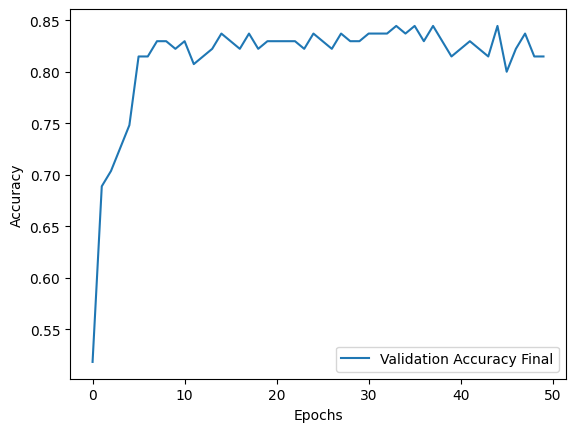

Accuracy on test set was 86.02941176470588%


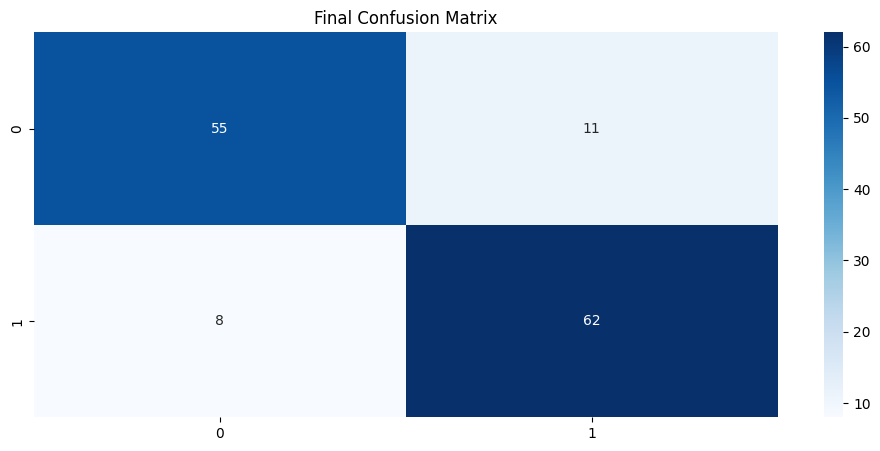

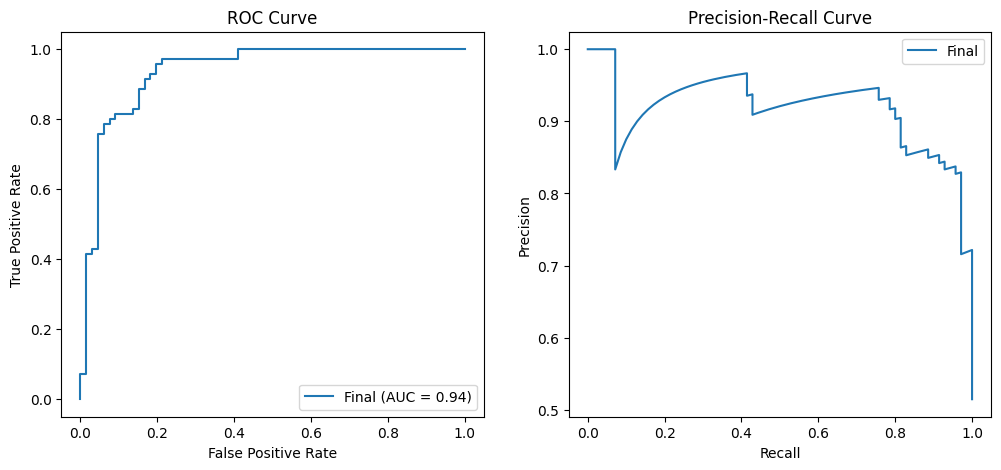

In [25]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True, worker_init_fn=np.random.seed(seed))
val_loader = DataLoader(val_set, batch_size=64, shuffle=True, worker_init_fn=np.random.seed(seed))
test_loader = DataLoader(test_set, batch_size=64, shuffle=True, worker_init_fn=np.random.seed(seed))

# Optimised performance with new design parameters
class NiceNeuralNet(nn.Module):
    def __init__(self):
        super(NiceNeuralNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X.shape[1], 16),  # First hidden layer
            nn.SiLU(),
            nn.Linear(16, 8),  # Second hidden layer
            nn.SiLU(),
            nn.Linear(8, 4),  # Second hidden layer
            nn.SiLU(),
            nn.Linear(4, 1),  # Output layer for binary classification
            nn.Sigmoid()  # Sigmoid to output probabilities in [0, 1]
        )

    def forward(self, x):
        return self.model(x)

model_final = NiceNeuralNet()
criterion = nn.BCELoss()
optimizer = optim.Adam(model_final.parameters(), lr=0.005)

print("Training with Sigmoid activation:")
history_final = train_model(model_final, optimizer, criterion, train_loader, val_loader, epochs=50)

# Evaluate on test set
y_final = test_model(model_final, test_loader)

# Print metrics for model with Sigmoid activation
model_metrics(history_final, "Final", y_final)


***ΕΡΩΤΗΜΑ Δ***

Για διαφορετικά seeds με την νέα αρχιτεκτονική φαίνεται η ακρίβεια του συστήματος να έχει βελτιωθεί και μάλιστα να είναι πιο σταθερή - να έχει μικρότερη διακύμανση. Ο λόγος που είναι πιο αξιόπιστο σε θέμα ακρίβειας είναι ότι έχουν προστεθεί 2 επιπλέον επίπεδα και οι νευρώνες έχουν μοιραστεί σε αυτά πιο ομοιόμορφα, συνιστώντας ένα νευρωνικό δίκτυο 4 επιπέδων. Γίνεται χρήση της SiLU για τον λόγο ότι είναι παραγωγίσιμο στο κρίσιμο σημείο της ReLU (x = 0) το οποίο επιτρέπει μεγαλύτερη ανάλυση της παραγώγου και στη γειτονιά αυτού του σημείου. Επίσης έχει μειωθεί το learning rate, ώστε η ενημέρωση των βαρών να γίνονται με μικρότερο βήμα και να μην υπάρχει σφάλμα λόγω της μικρής του ανάλυσης. Σαν optimiser στη φάση οπισθοδιάδοσης χρησιμοποιείται ο Adam. Η καλύτερη απόδοση διαπιστώθηκε, αρχικά, καθαρά πειραματικά. Ο λόγος είναι πως έχει adaptive step για κάθε παράμετρο, και παρουσιάζει ταχύτερη σύγκλιση, πράγμα που μας επέτρεψε να μειωθούν και οι εποχές εκπαίδευσης, παρότι χρησιμοποίεται πιο σύνθετη συνάρτηση ενεργοποίησης στα κρυφά επίπεδα.

